# Streaming Wars: An Analysis of OTT Platforms
This is a data analysis project on OTT platforms including <b> Netflix, Hulu, Disney and Amazon Prime</b>. Visualizations are done using Matplotlib and Seaborn

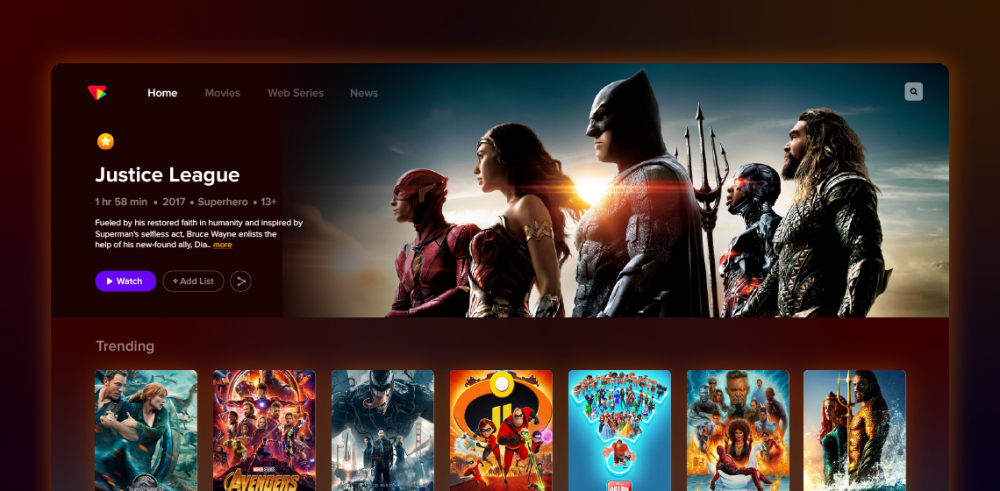

In [1]:
import numpy as np
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
netflix = pd.read_csv('netflix_titles.csv')
amazon_prime = pd.read_csv('amazon_prime_titles.csv')
hulu = pd.read_csv('hulu_titles.csv')
disney = pd.read_csv('disney_plus_titles.csv')

In [3]:
netflix['platform'] = 'Netflix'
amazon_prime['platform'] = 'Amazon Prime Video'
hulu['platform'] = 'Hulu'
disney['platform'] = 'Disney'

In [4]:
Over_the_Top = pd.concat([netflix, amazon_prime, hulu, disney],axis=0)

In [5]:
OTT_players = Over_the_Top.groupby(['platform','type'],).count()
OTT_players.head(10)

show_id  title  director  cast  country  \
platform           type                                               
Amazon Prime Video Movie       7814   7814      7586  7050      569   
                   TV Show     1854   1854         0  1385      103   
Disney             Movie       1052   1052       977   933      946   
                   TV Show      398    398         0   327      285   
Hulu               Movie       1484   1484         3     0      661   
                   TV Show     1589   1589         0     0      959   
Netflix            Movie       6131   6131      5943  5656     5691   
                   TV Show     2676   2676       230  2326     2285   

                            date_added  release_year  rating  duration  \
platform           type                                                  
Amazon Prime Video Movie            16          7814    7483      7814   
                   TV Show         139          1854    1848      1854   
Disney             Movie          1052          1052    1051      1052   
                   TV Show         395           398     396       398   
Hulu               Movie          1484          1484    1194      1005   
                   TV Show        1561          1589    1359      1589   
Netflix            Movie          6131          6131    6129      6128   
                   TV Show        2666          2676    2674      2676   

                            listed_in  description  
platform           type                             
Amazon Prime Video Movie         7814         7814  
                   TV Show       1854         1854  
Disney             Movie         1052         1052  
                   TV Show        398          398  
Hulu               Movie         1484         1481  
                   TV Show       1589         1588  
Netflix            Movie         6131         6131  
                   TV Show       2676         2676

We can get an idea about the missing values in the dataframe. Hulu has a lot of missing values for the director's names irrespective of the type of content, followed by Disney, Netflix and Amazon Prime Video. <br>
Amazon Prime has the highest number of content online followed by Netflix, Hulu and Disney respectively. <br>
We know the dates for the release year but we have a lot of missing values for date added to the respective platforms. <br>
Let's begin our analysis with the top player on the OTT platform = Amazon Prime Video

In [6]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix


Let us go through the data...
All the column names are lower case and there are no spaces in between <br>
Missing values - director, cast, country, date_added, rating and duration <br>
Only release_year has data type - int64 & date_added - object datatype <br>
1) show_id both for movies and shows are sN....should the two have separate ids? <br>
2) title does not have missing values <br>
3) DURATION : for movies and tv shows is given together - in mins and seasons --> 1 'Season' and 2 'Seasons'<br>
4) listed_in is a good aggregating factor <br>
5) every content has some description
6) release_year (1925-2021)
7) date_added 

##### Ratings
G, TV-Y,TV-G - Little kids <br>
PG, TV-Y7,TV-Y7-FV, TV-PG - Older kids <br>
PG-13 , TV-14 - Teens <br>
R, NC-17, TV-MA - Mature Audience

In [7]:
# Pie chart - Distribution of movies and TV shows 
netflix_movies = netflix.loc[netflix['type']=='Movie']
netflix_tv_shows = netflix.loc[netflix['type']=='TV Show']
netflix_tv_shows = netflix_tv_shows.rename(columns = {'duration':'seasons'})

In [8]:
netflix_tv_shows.replace({'seasons': {'1 Season': '1 Seasons'}}, inplace = True)
netflix_tv_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description,platform
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Seasons,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Seasons,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Seasons,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Netflix


In [9]:
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Netflix
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Netflix
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Netflix
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Netflix


In [10]:
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
platform          0
dtype: int64

In [11]:
netflix_movies = netflix_movies.dropna(subset = ['duration'])

In [12]:
netflix_movies.duration = netflix_movies.duration.str.replace(' min','')

In [13]:
netflix_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6128 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6128 non-null   object
 1   type          6128 non-null   object
 2   title         6128 non-null   object
 3   director      5940 non-null   object
 4   cast          5653 non-null   object
 5   country       5688 non-null   object
 6   date_added    6128 non-null   object
 7   release_year  6128 non-null   int64 
 8   rating        6126 non-null   object
 9   duration      6128 non-null   object
 10  listed_in     6128 non-null   object
 11  description   6128 non-null   object
 12  platform      6128 non-null   object
dtypes: int64(1), object(12)
memory usage: 670.2+ KB


In [14]:
netflix_movies.duration = netflix_movies.duration.astype(int)
# netflix_movies.info()
# netflix_movies.head()
# netflix_tv_shows.head()

In [15]:
# setting up the stage for charts 

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10, 3)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams['figure.dpi'] = 200

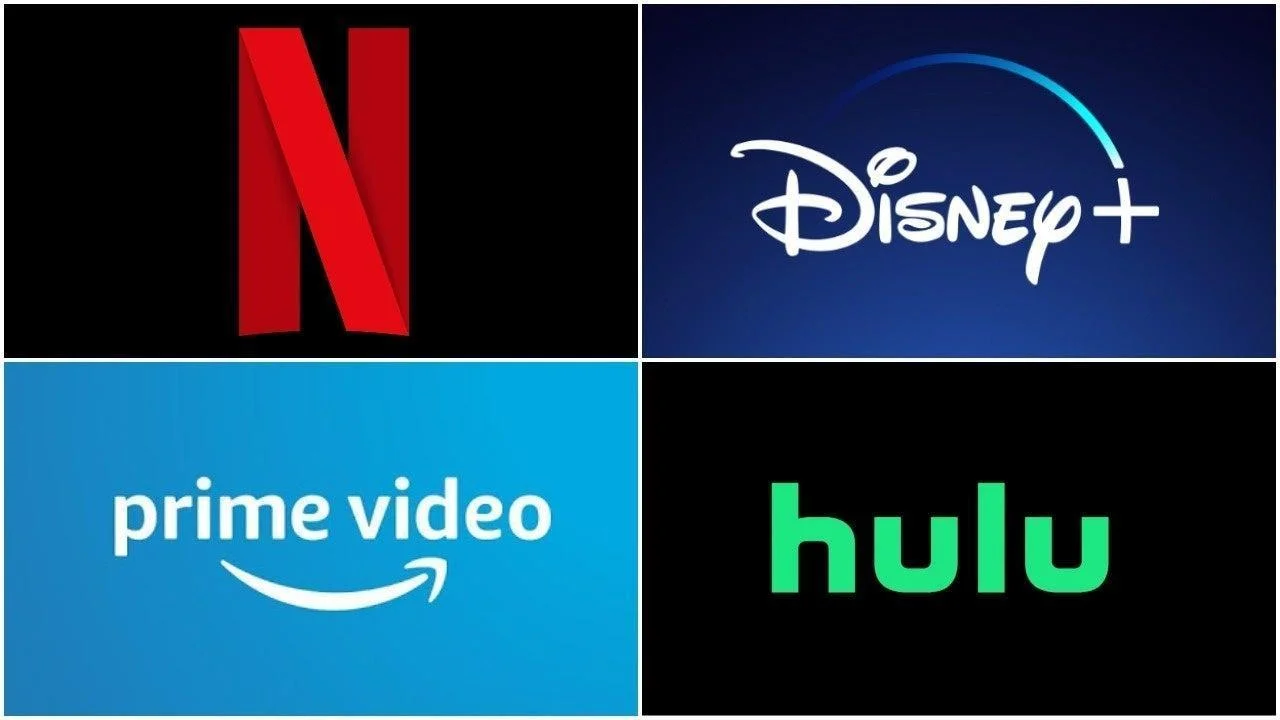

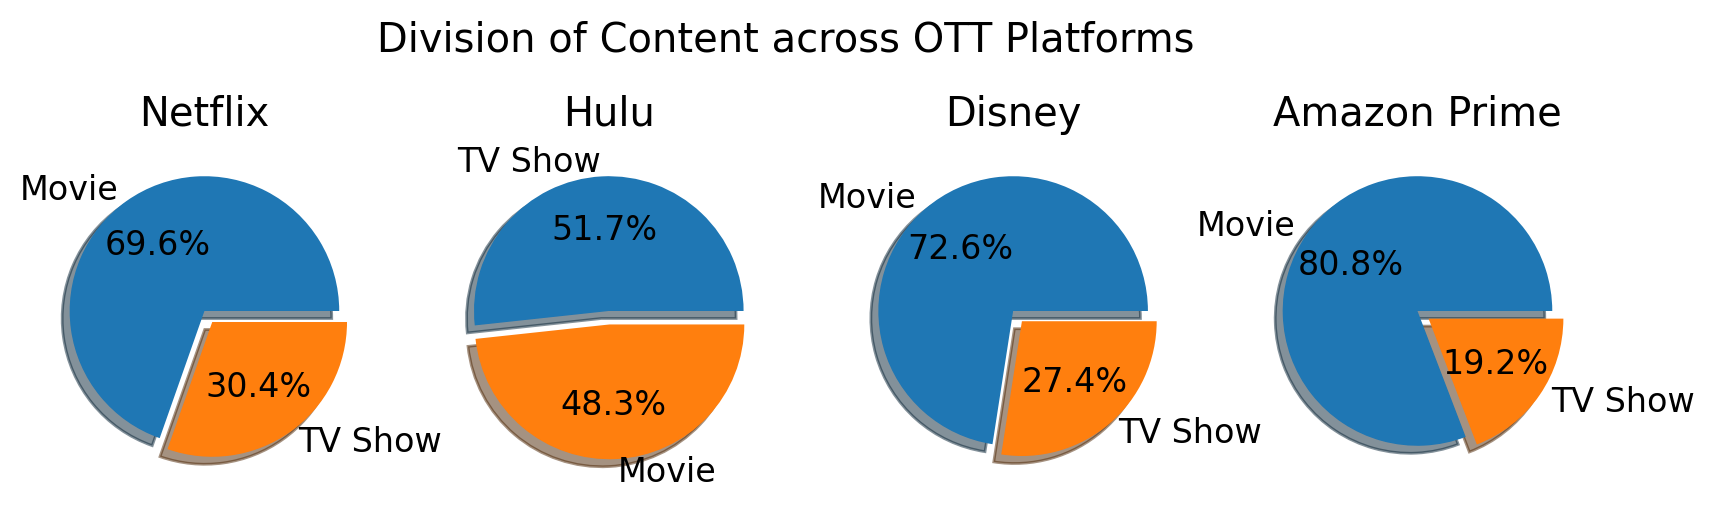

In [17]:
# fig = plt.figure(figsize = (8,3))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.pie(netflix.type.value_counts(), labels = netflix.type.value_counts().index, autopct='%1.1f%%', 
        shadow = True, explode = (0,0.1))
# ax1.legend(netflix.type)

ax2.pie(hulu.type.value_counts(), labels = hulu.type.value_counts().index, autopct='%1.1f%%', 
        shadow = True, explode = (0,0.1))
# ax2.legend(hulu.type)

ax3.pie(disney.type.value_counts(), labels = disney.type.value_counts().index, autopct='%1.1f%%', 
        shadow = True, explode = (0,0.1))
# ax3.legend(disney.type)

ax4.pie(amazon_prime.type.value_counts(), labels = amazon_prime.type.value_counts().index, autopct='%1.1f%%', 
        shadow = True, explode = (0,0.1))
# ax4.legend(amazon_prime.type)

fig.suptitle('Division of Content across OTT Platforms')
# fig.legend(loc="right")
sns.color_palette()

ax1.set_title('Netflix')
ax2.set_title('Hulu')
ax3.set_title('Disney')
ax4.set_title('Amazon Prime')

ax1.plot(1,2)
ax2.plot(1,-2);

In [18]:
sns.set_style('whitegrid') # plot with grid

## Unveiling the Streaming Giant: A Comprehensive Data Analysis of Netflix 

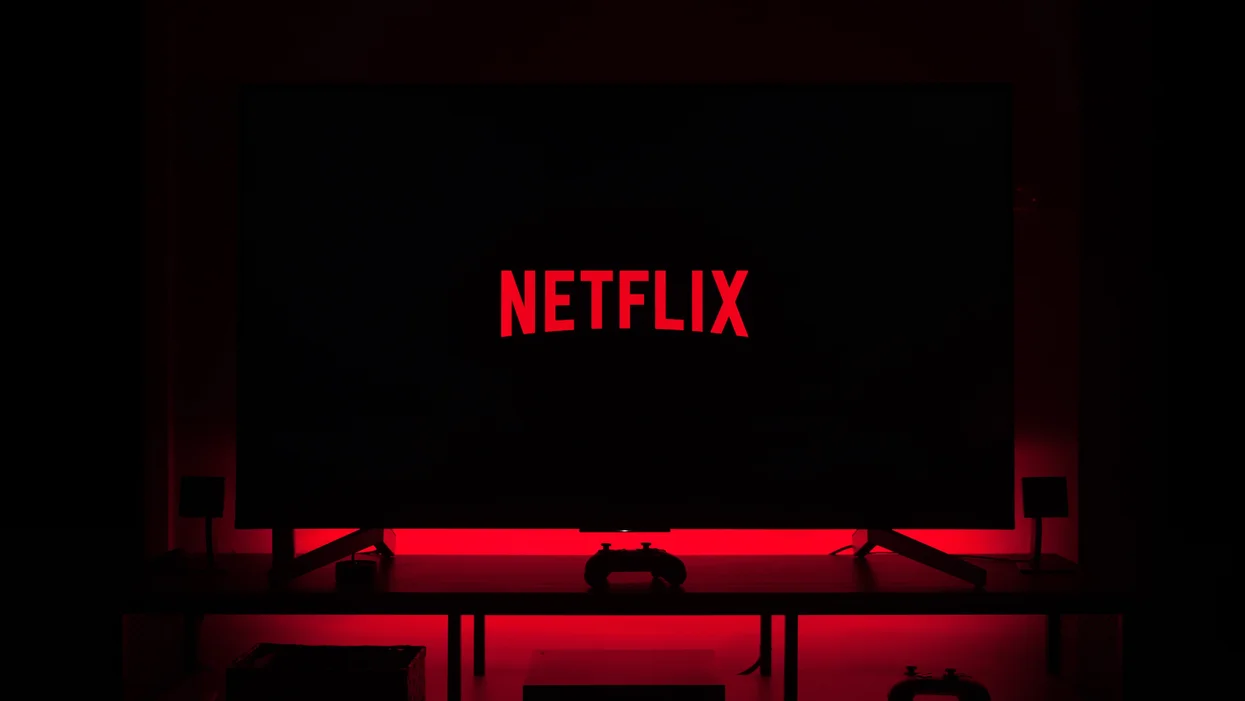

In [19]:
netflix_movies.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Netflix


In [20]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
movie_rating = netflix_movies['rating'].value_counts()[rating_order] 
# movie_rating = netflix_movies['rating'].value_counts() -- will give you the count of movies for each rating
# when you give it another attribute [rating_order] -- it will order it with respect to the order specified in the array

In [21]:
netflix_tv_shows.rating.unique()

array(['TV-MA', 'TV-14', 'TV-Y7', 'TV-PG', 'TV-Y', 'TV-G', 'R', 'NR', nan,
       'TV-Y7-FV'], dtype=object)

In [22]:
movie_rating

G             41
TV-Y         131
TV-G         126
PG           287
TV-Y7        139
TV-Y7-FV       5
TV-PG        540
PG-13        490
TV-14       1427
R            797
NC-17          3
TV-MA       2062
Name: rating, dtype: int64

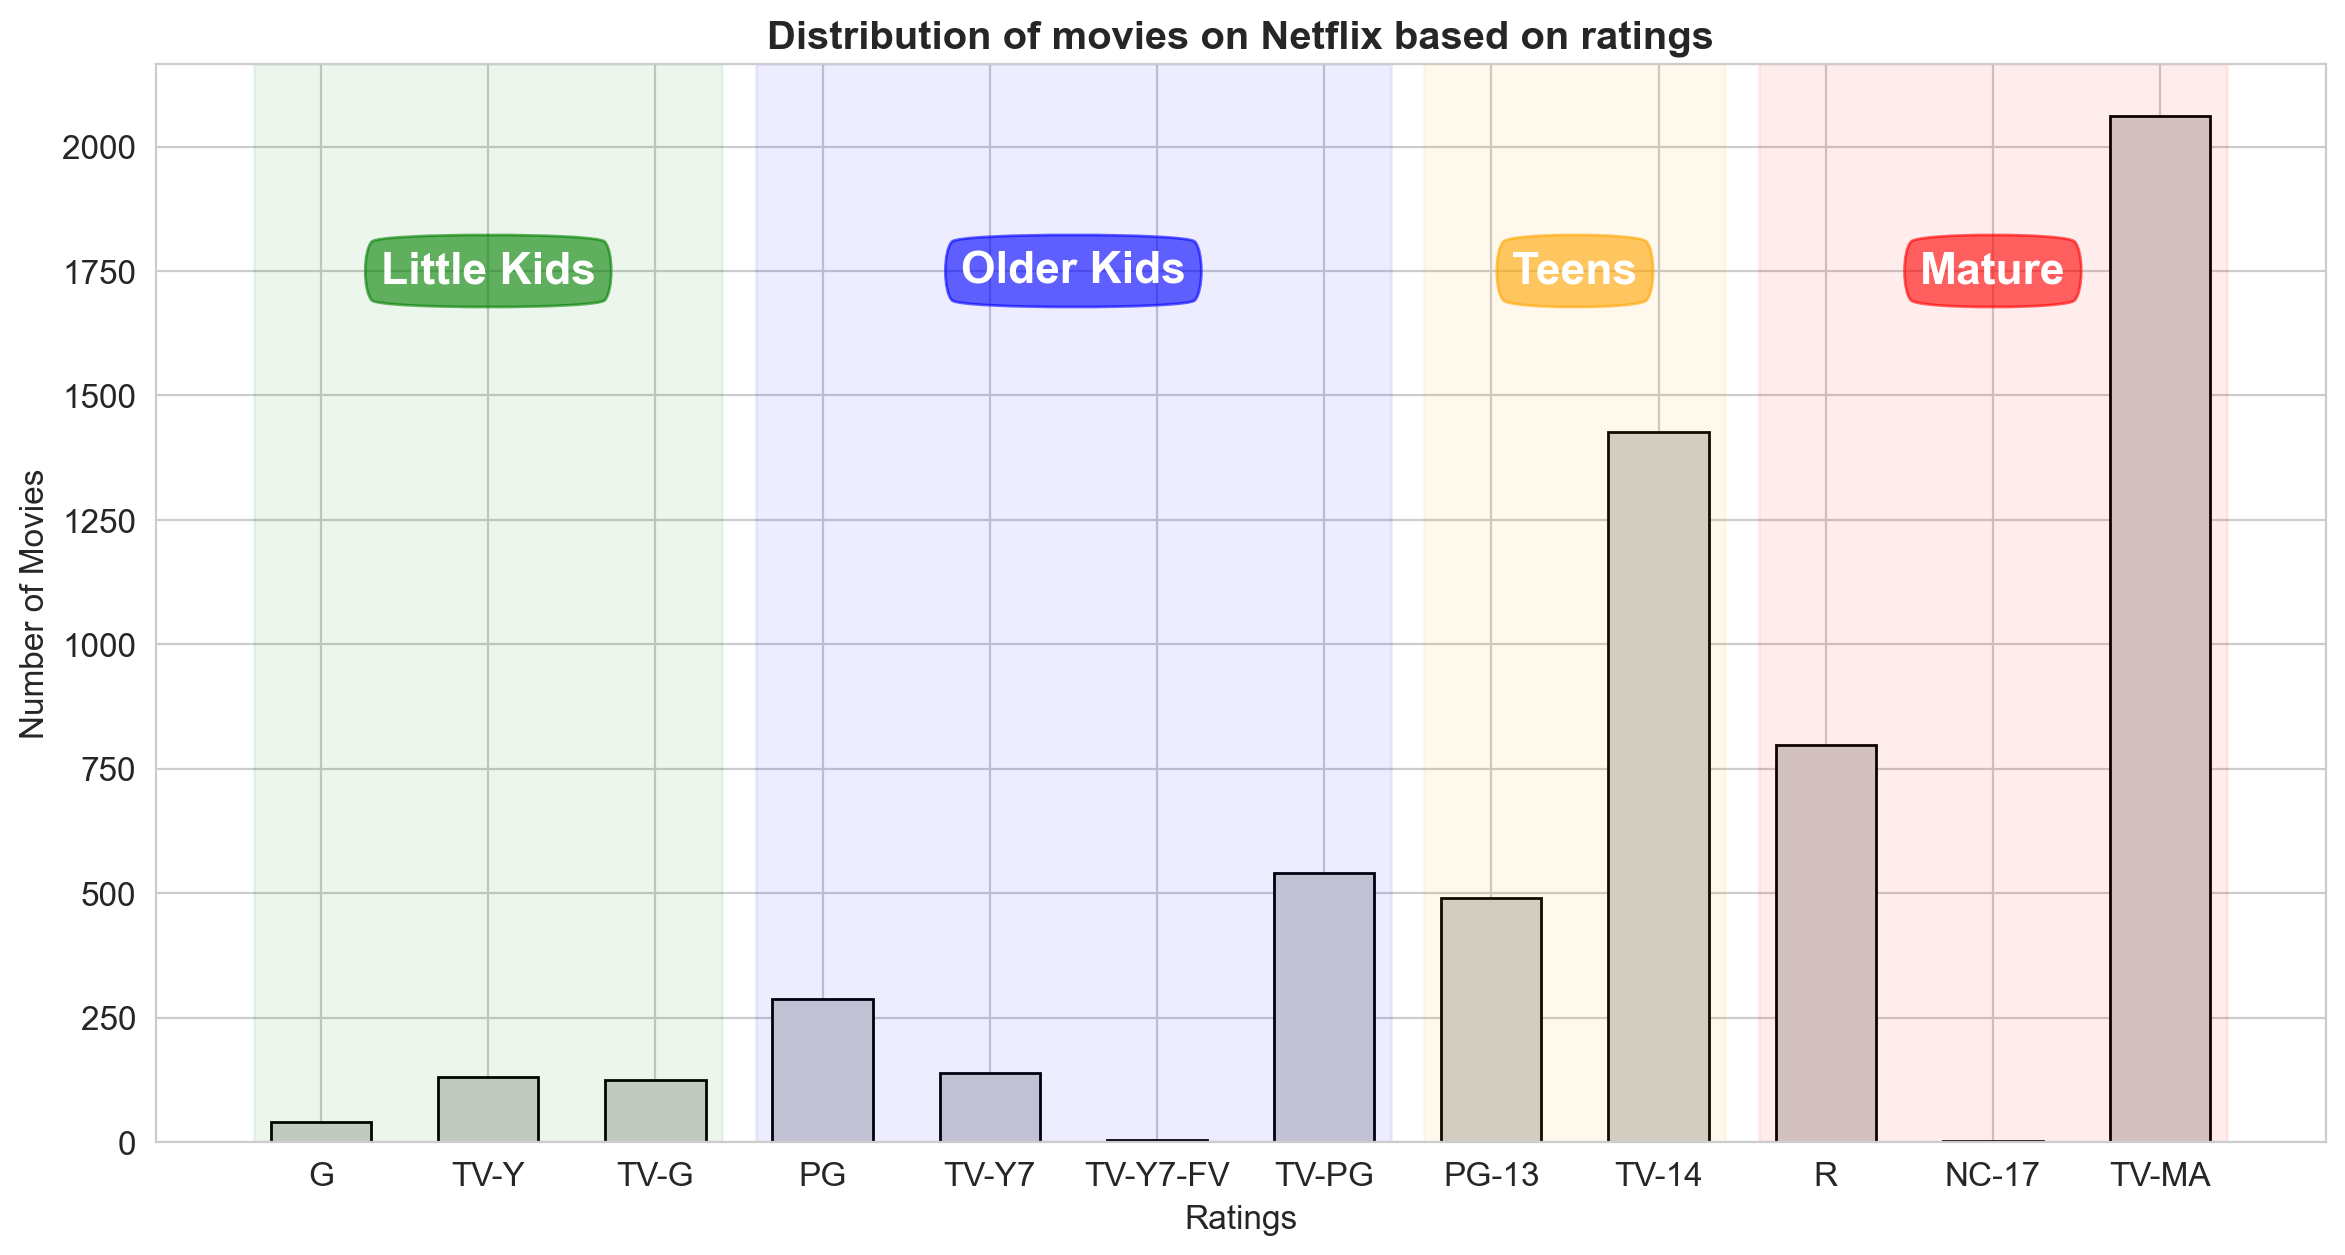

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
height = 1750
ax.bar(movie_rating.index, movie_rating, color="#d0d0d0", width=0.6, edgecolor='black')
ax.set_title('Distribution of movies on Netflix based on ratings', fontweight = 'bold');
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Movies')

color =  ['green',  'blue',  'orange',  'red']
span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)

/Users/shru/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


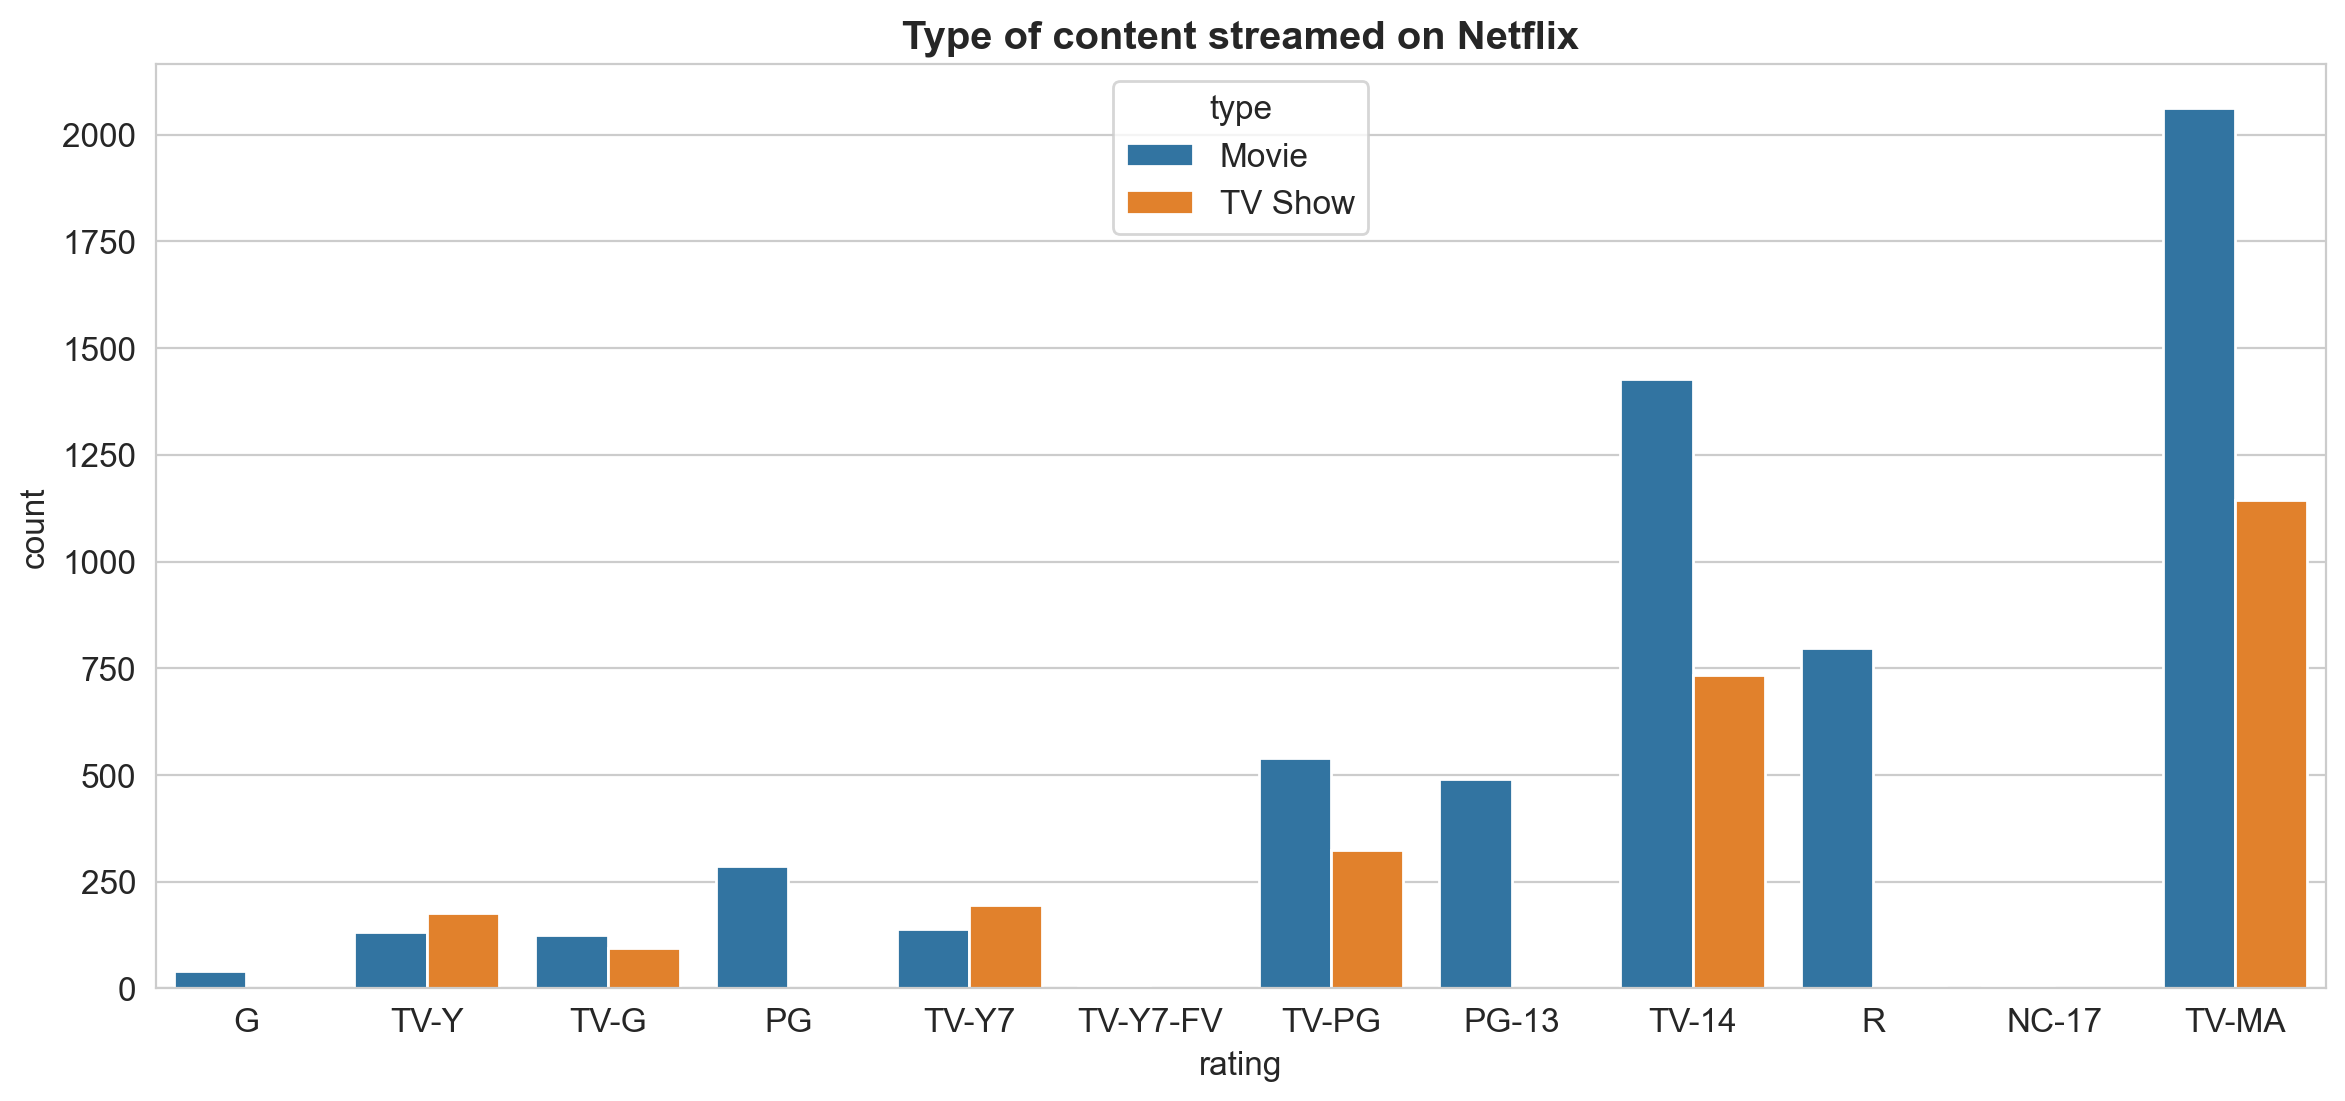

In [47]:
# sns.set_style('whitegrid')
plt.figure(figsize = (14,6))
plt.title('Type of content streamed on Netflix', fontweight = 'bold')
plt.xlabel('Ratings')
plt.ylabel('Total Content')
# plt.legend(loc = "upper left")
sns.countplot(netflix.rating, hue = netflix.type, order = rating_order);

/var/folders/kd/vczjh0f55158sc6lflbyfd4w0000gn/T/ipykernel_6420/1222992782.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


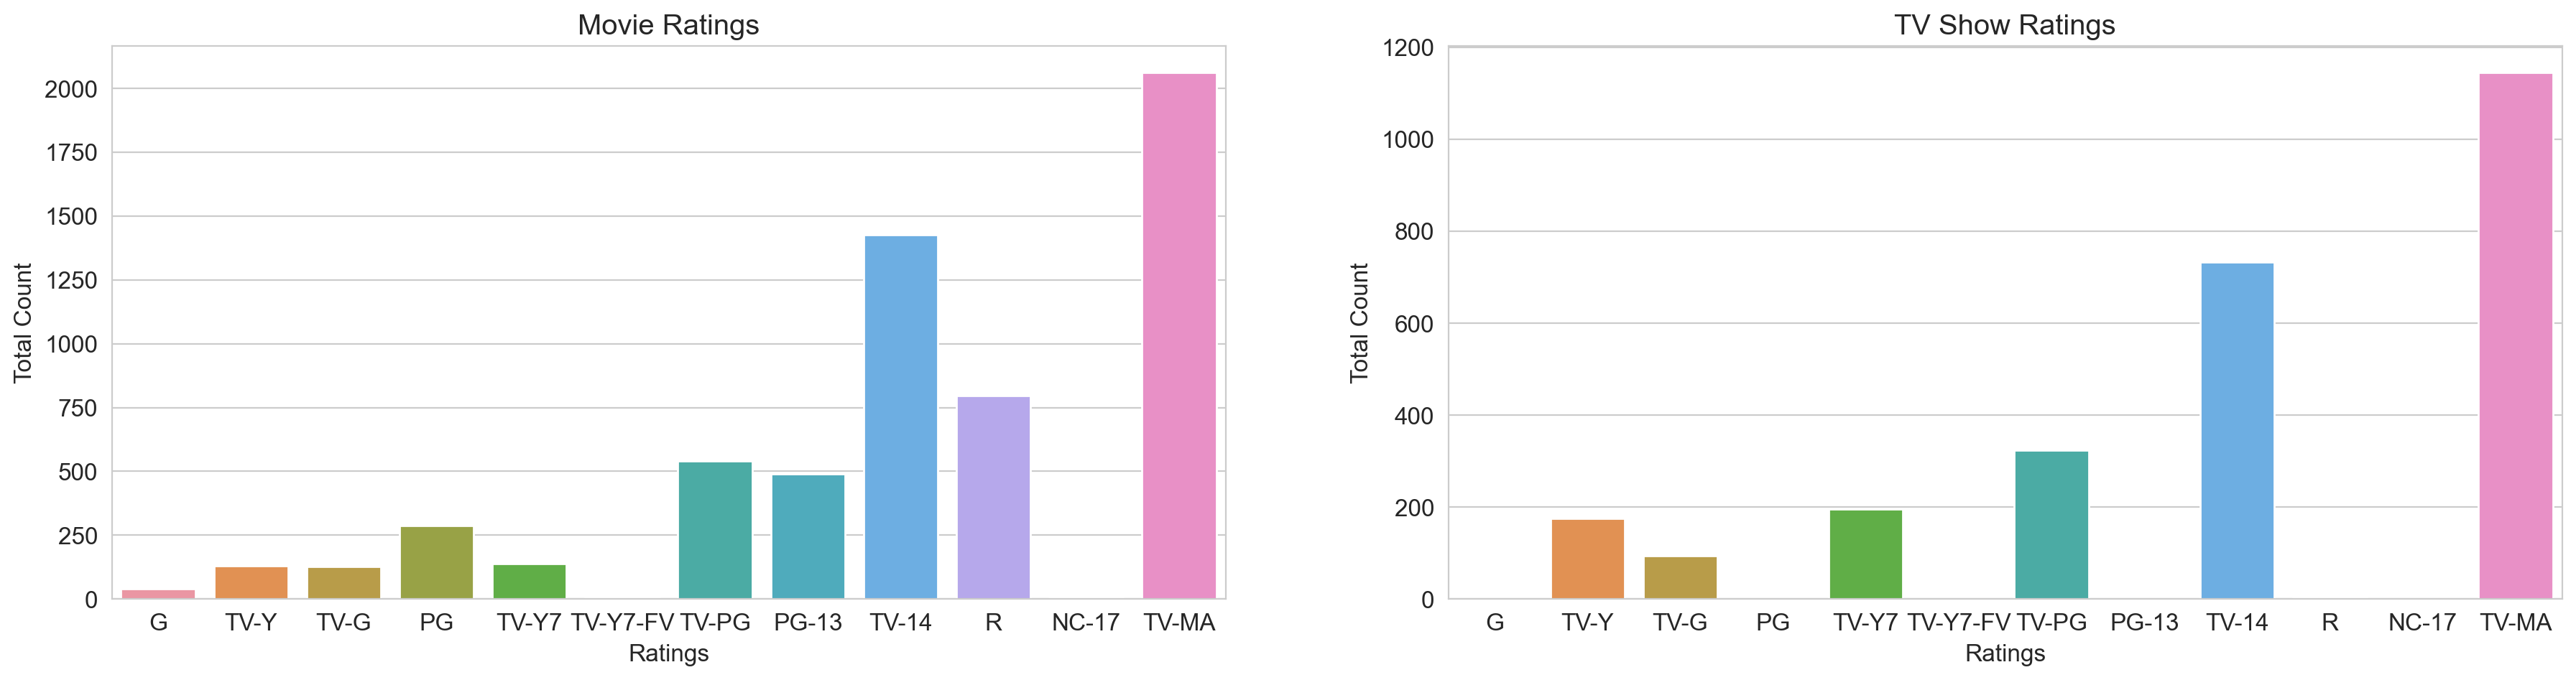

In [56]:
fig, ax = plt.subplots(1,2, figsize = (22,5))
g1 = sns.countplot(data = netflix_movies, x= netflix_movies.rating, order = rating_order, ax = ax[0])
g1.set_title('Movie Ratings')
g1.set_xlabel('Ratings')
g1.set_ylabel('Total Count')
g2 = sns.countplot(data = netflix_tv_shows, x = netflix_tv_shows.rating, order = rating_order, ax = ax[1])
g2.set_title('TV Show Ratings')
g2.set_xlabel('Ratings')
g2.set_ylabel('Total Count')
fig.show();

In [60]:
netflix[['month','year']] = netflix.date_added.str.split(',',expand=True)

In [83]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform,year,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,2021,2021.0,9.0,25.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,2021,2021.0,9.0,24.0


In [80]:
netflix['year_added'] = pd.DatetimeIndex(netflix['date_added']).year
netflix['month_added'] = pd.DatetimeIndex(netflix['date_added']).month
netflix['day_added'] = pd.DatetimeIndex(netflix['date_added']).day

In [87]:
netflix = netflix.drop(['year'], axis=1) # month column dropped

In [102]:
# netflix.info()
netflix_traffic = netflix.groupby(['year_added','month_added']).value_counts().unstack().fillna(0).T
# netflix_traffic.head(2)

In [98]:
netflix_month_level_traffic = netflix.groupby(['year_added'])['month_added'].value_counts().unstack().fillna(0).T
netflix_month_level_traffic

year_added,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
month_added,,,,,,,,,,,,,,
1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,43.0,72.0,129.0,153.0,205.0,132.0
2.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,15.0,82.0,87.0,148.0,114.0,109.0
3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,17.0,125.0,173.0,172.0,137.0,112.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,93.0,115.0,162.0,177.0,188.0
5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,13.0,86.0,97.0,139.0,157.0,132.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,79.0,152.0,157.0,146.0,257.0
8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,34.0,115.0,164.0,131.0,129.0,178.0
9.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,48.0,113.0,124.0,123.0,168.0,183.0


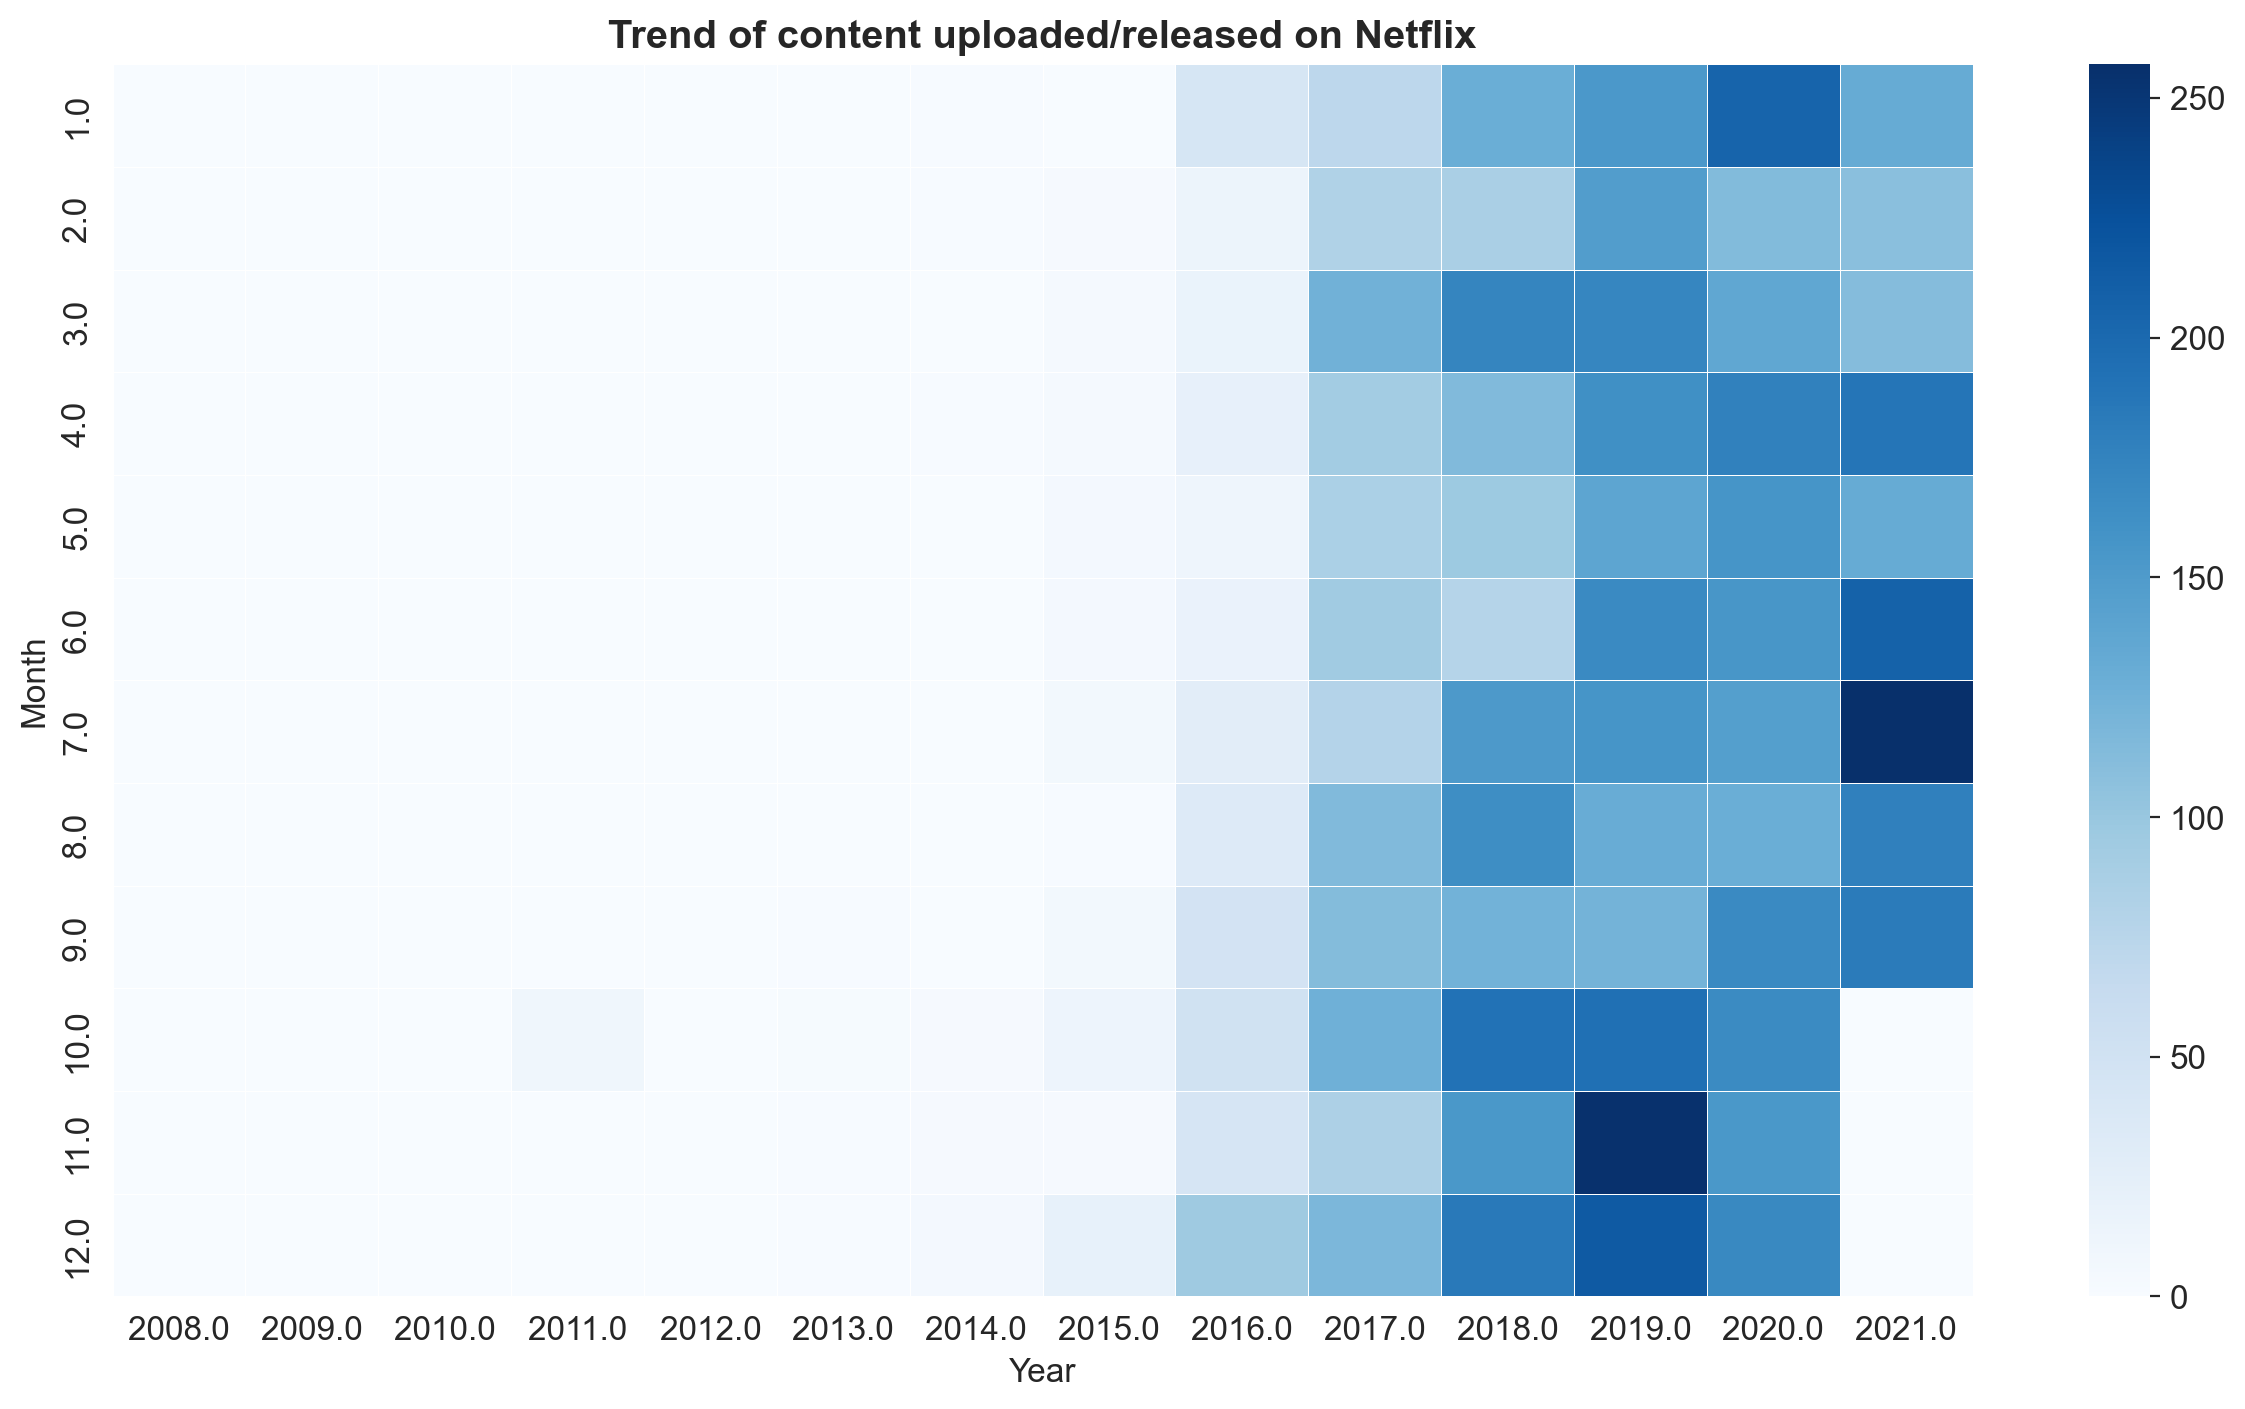

In [121]:
plt.figure(figsize = (15,8))
sns.heatmap(netflix_month_level_traffic, cmap = 'Blues', linewidth = 0.25)
plt.title('Trend of content uploaded/released on Netflix', fontweight = 'bold')
plt.xlabel('Year')
plt.ylabel('Month');

## Netflix Duration of Content

In [158]:
netflix_tv_shows.seasons

1       2 Seasons
2       1 Seasons
3       1 Seasons
4       2 Seasons
5       1 Seasons
          ...    
8795    2 Seasons
8796    2 Seasons
8797    3 Seasons
8800    1 Seasons
8803    2 Seasons
Name: seasons, Length: 2676, dtype: object

In [159]:
# netflix_shows_df.seasons = netflix_shows_df.seasons.str.replace(' Seasons','').astype(int)
netflix_tv_shows.seasons = netflix_tv_shows.seasons.str.replace(' Seasons','').astype(int)

/Users/shru/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shru/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/kd/vczjh0f55158sc6lflbyfd4w0000gn/T/ipykernel_6420/3299918246.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


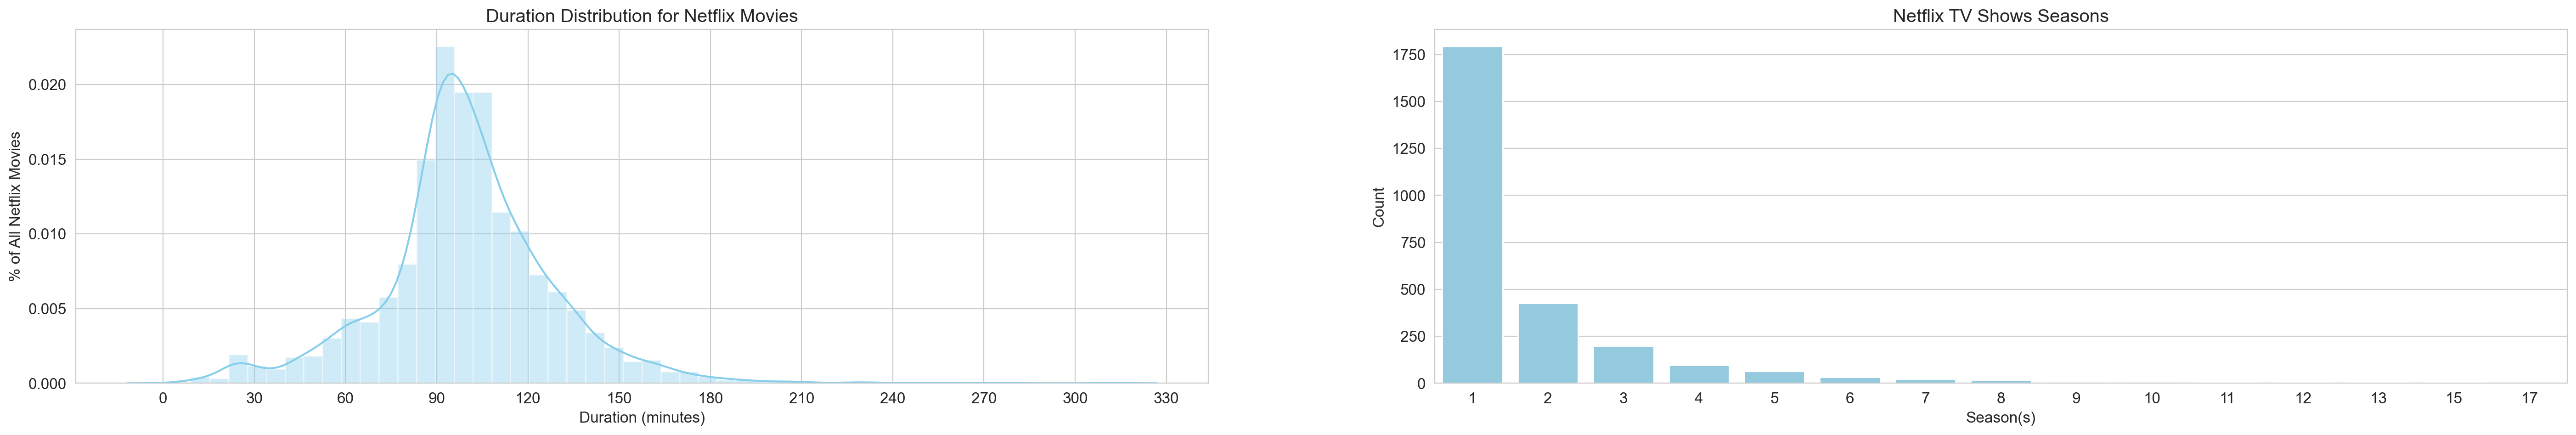

In [160]:
fig, ax = plt.subplots(1,2, figsize=(35, 5))
g1 = sns.distplot(netflix_movies.duration, color='skyblue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(netflix_tv_shows.seasons, color='skyblue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()

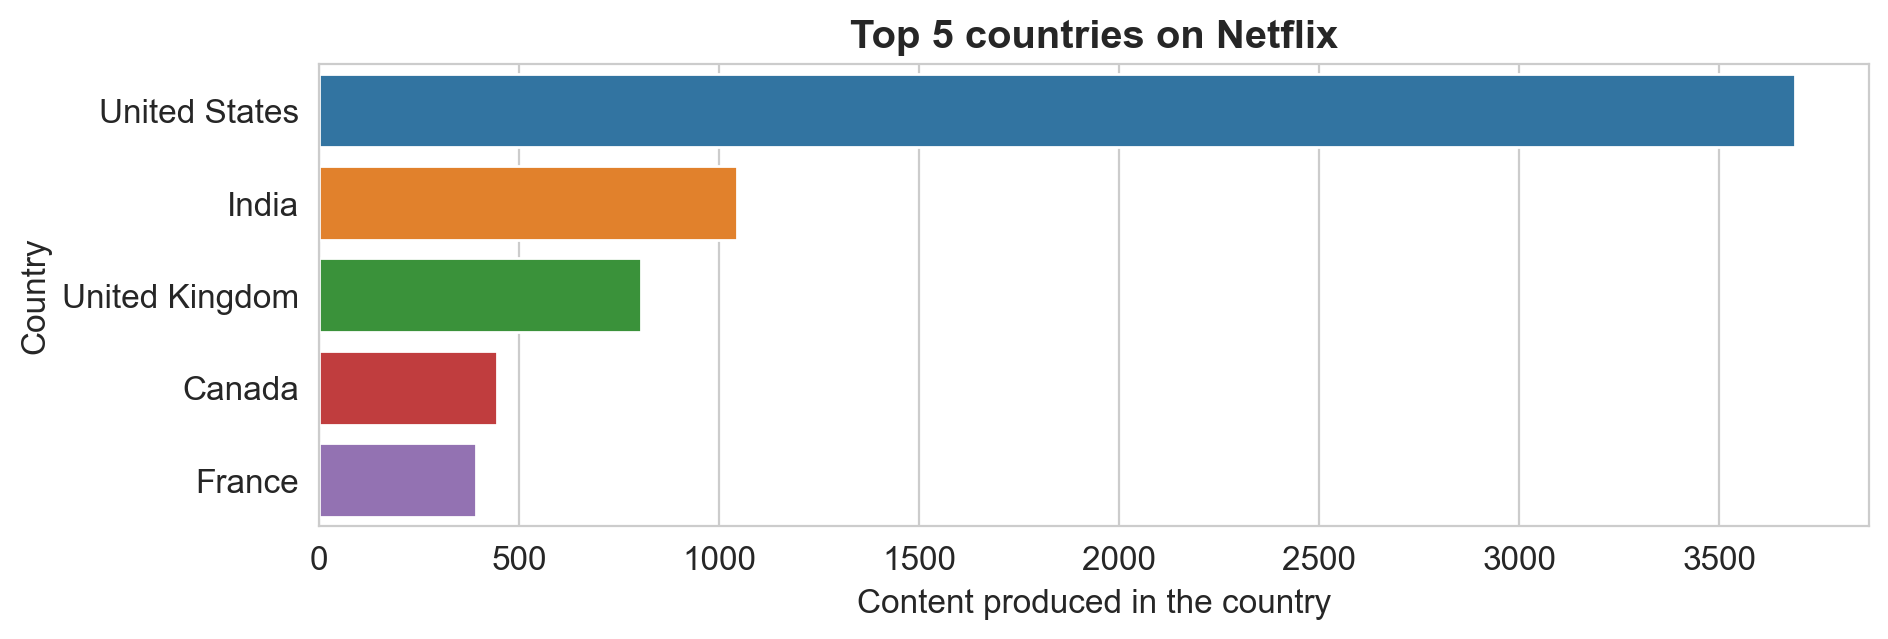

In [214]:
countries_netflix = netflix.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
countries_netflix = countries_netflix[countries_netflix != 'Country Unavailable']
gn = sns.countplot(y = countries_netflix, order = countries_netflix.value_counts().index[:5])

# plt.figure(figsize = (3,1))
# seaborn.set_palette(palette, n_colors=None, desat=None, color_codes=False)
# sns.color_palette("pastel")
# sns.set_color_codes("pastel")
# sns.color_palette("Blues", as_cmap=True)
# sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

plt.title('Top 5 countries on Netflix', fontweight = 'bold')
plt.xlabel('Content produced in the country')
plt.ylabel('Country')
plt.show()

In [236]:
# top 5 cast/ actors on netflix based on number of movies/tv shows they are in
# netflix.head(3)
# netflix.info()
netflix.cast.unique()

array([nan,
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=object)

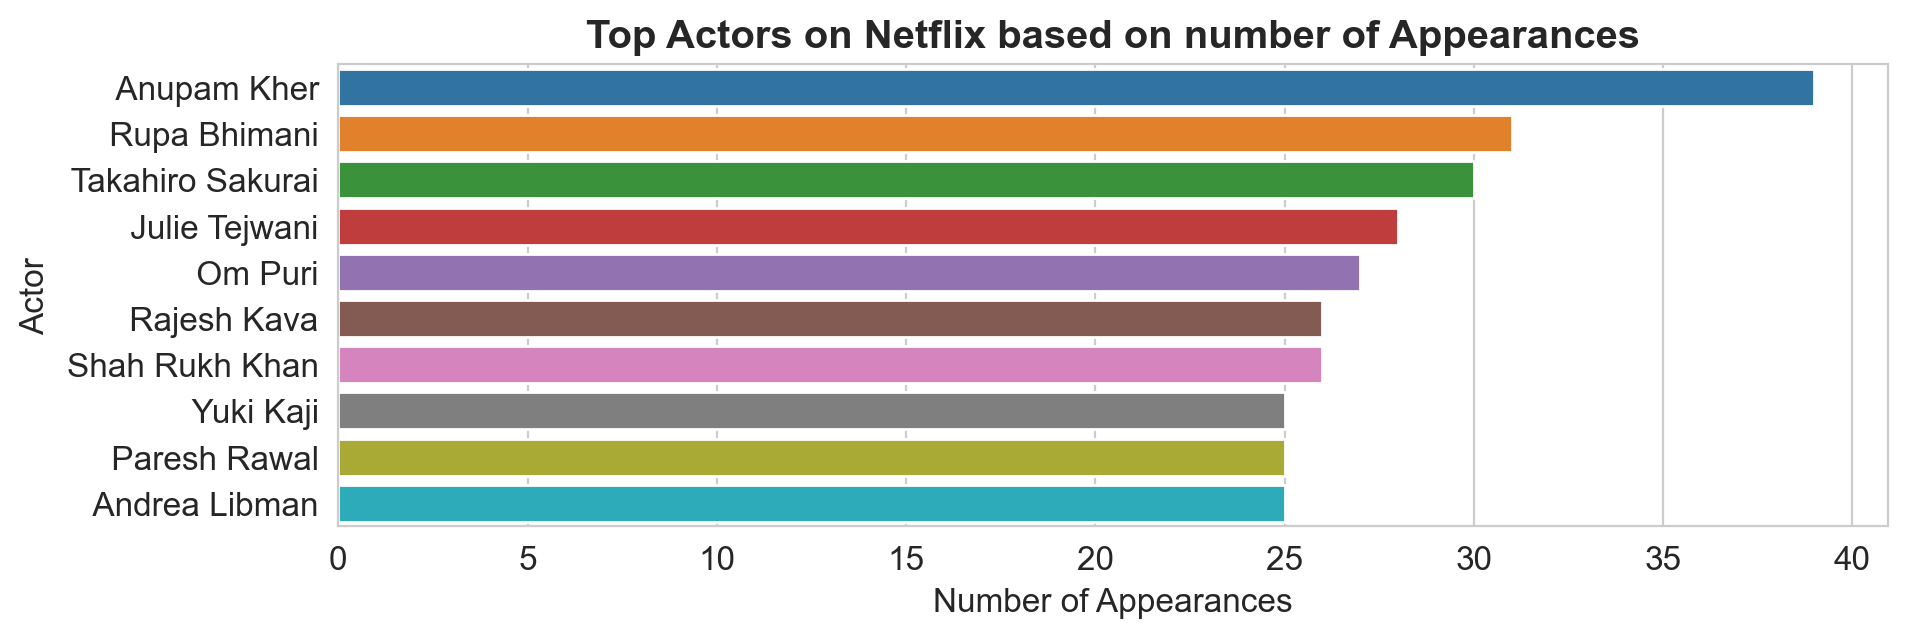

In [247]:
actors_netflix = netflix.copy()
actors_netflix = actors_netflix.cast.str.split(',',expand = True).stack().reset_index(level=1, drop= True)
actors_netflix = actors_netflix.dropna()
gn = sns.countplot(y = actors_netflix, order = actors_netflix.value_counts().index[:10])
plt.title('Top Actors on Netflix based on number of Appearances', fontweight = 'bold')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor');
# actors_netflix.head()

In [249]:
# Top Genres on Netflix 
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,2021.0,9.0,25.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,2021.0,9.0,24.0


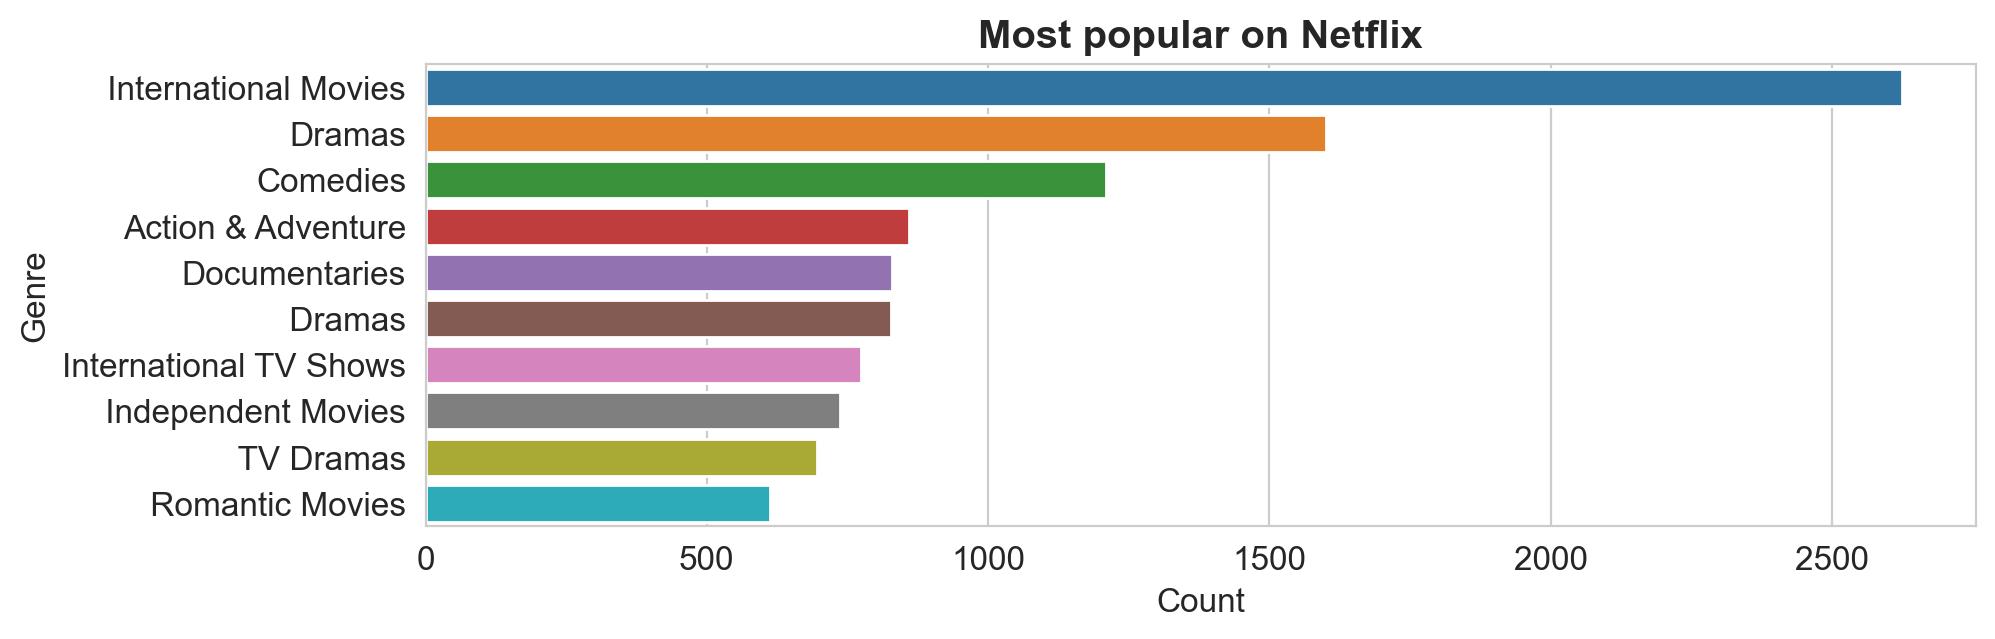

In [263]:
genre_netflix = netflix.copy()
genre_netflix = genre_netflix.listed_in.str.split(',', expand = True).stack().reset_index(level = 1, drop = True)
genre_netflix = genre_netflix.dropna()
gn = sns.countplot(y=genre_netflix, order = genre_netflix.value_counts().index[:10])
plt.title('Most popular on Netflix', fontweight = 'bold')
plt.xlabel('Count')
plt.ylabel('Genre');
# genre_netflix.head()

In [267]:
# top directors on Netflix
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,2021.0,9.0,25.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,2021.0,9.0,24.0


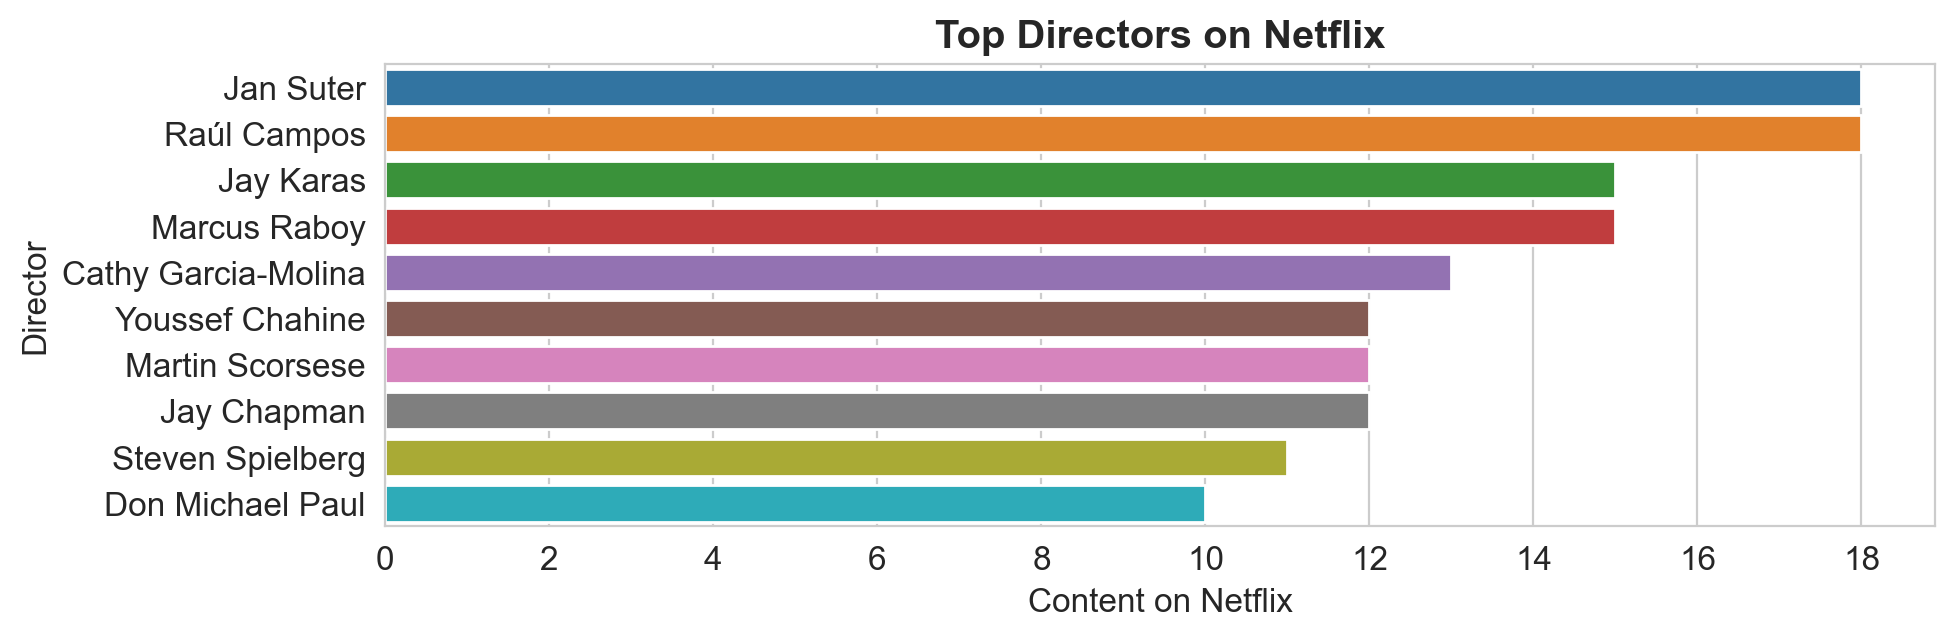

In [292]:
# difference between stack and unstack
directors_netflix = netflix.copy()
directors_netflix = directors_netflix.dropna()
directors_netflix = directors_netflix.director.str.split(',', expand = True).stack().reset_index(level=1, drop = True)
gn = sns.countplot(y = directors_netflix, order = directors_netflix.value_counts().index[:10])
gn.set_xticks(np.arange(0,20,2))

# directors_netflix.head()
plt.title('Top Directors on Netflix', fontweight = 'bold')
plt.xlabel('Content on Netflix')
plt.ylabel('Director');